In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
dataset='/content/drive/MyDrive/8th_project_new'

In [ ]:
batch_size = 10
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  dataset,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)0

Found 613 files belonging to 4 classes.
Using 491 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  dataset,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 613 files belonging to 4 classes.
Using 122 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['bijay', 'monoj', 'pradipta', 'sanjeeb']


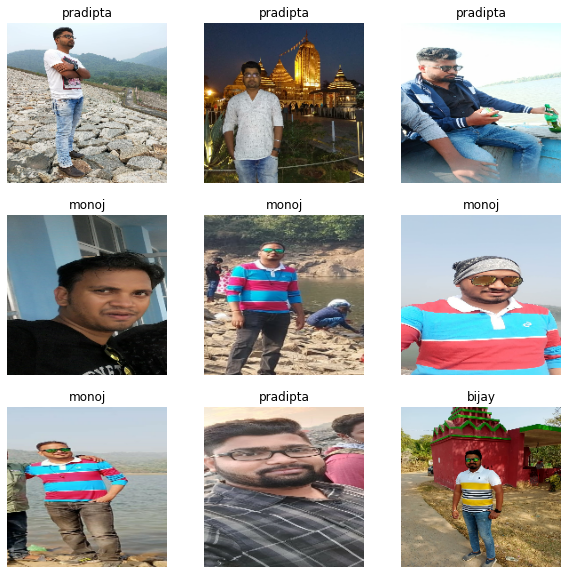

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(10, 180, 180, 3)
(10,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
num_classes=4
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
50/50 [==============================] - 27s 405ms/step - loss: 1.6443 - accuracy: 0.3376 - val_loss: 1.2865 - val_accuracy: 0.3443
Epoch 2/30
50/50 [==============================] - 19s 378ms/step - loss: 1.3067 - accuracy: 0.3677 - val_loss: 1.2733 - val_accuracy: 0.3279
Epoch 3/30
50/50 [==============================] - 19s 378ms/step - loss: 1.2700 - accuracy: 0.4218 - val_loss: 1.2058 - val_accuracy: 0.4508
Epoch 4/30
50/50 [==============================] - 19s 378ms/step - loss: 1.1937 - accuracy: 0.4732 - val_loss: 1.1440 - val_accuracy: 0.5246
Epoch 5/30
50/50 [==============================] - 19s 385ms/step - loss: 1.1484 - accuracy: 0.5585 - val_loss: 1.1186 - val_accuracy: 0.5820
Epoch 6/30
50/50 [==============================] - 19s 379ms/step - loss: 1.0880 - accuracy: 0.5183 - val_loss: 1.0213 - val_accuracy: 0.6393
Epoch 7/30
50/50 [==============================] - 19s 377ms/step - loss: 1.0625 - accuracy: 0.5496 - val_loss: 1.0733 - val_accuracy: 0.5902

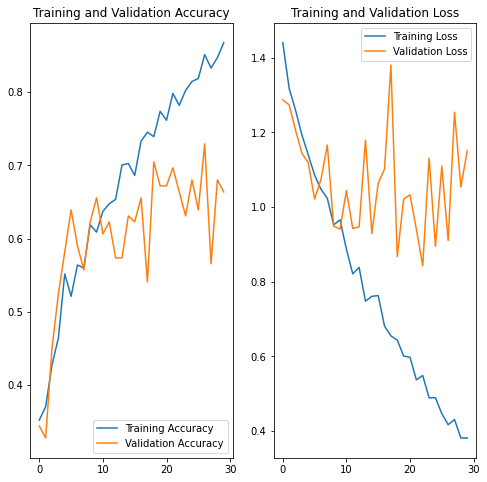

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

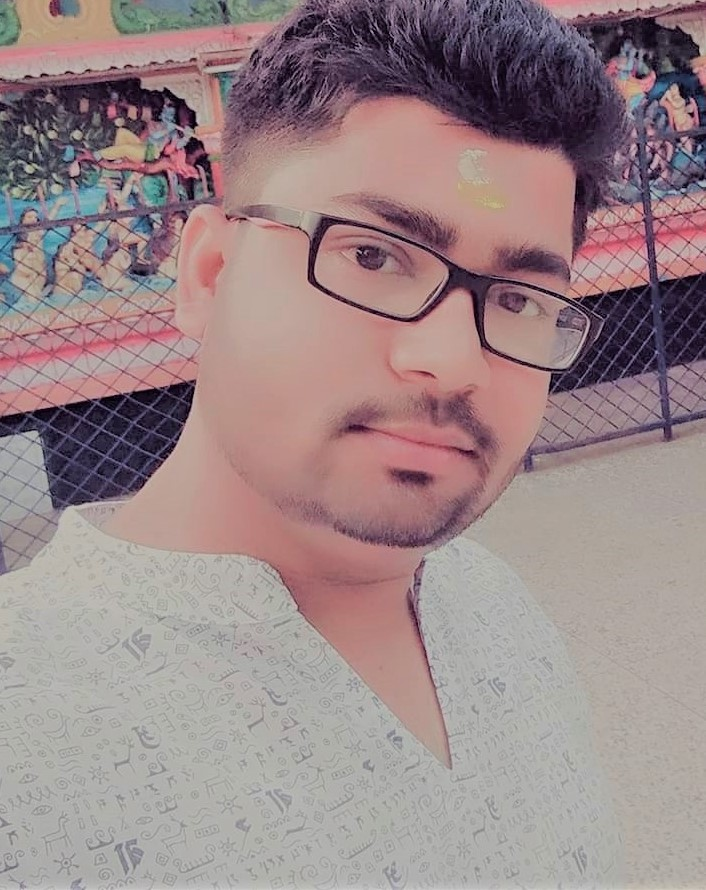

This image most likely belongs to pradipta with a 99.86 percent confidence.


In [ ]:

testset='/content/drive/MyDrive/26198218_1680972415343702_2545066294228251325_o.jpg'
img = keras.preprocessing.image.load_img(
    testset, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
from IPython.display import Image, display
display(Image(testset, width=250, height=250))

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

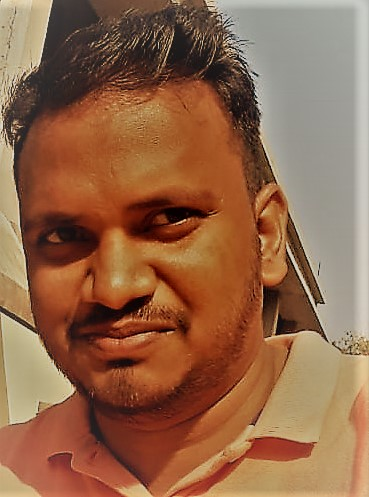

This image most likely belongs to monoj with a 87.33 percent confidence.


In [ ]:
testset3='/content/drive/MyDrive/IMG-20210102-WA0003 (1).jpg'
img = keras.preprocessing.image.load_img(
    testset3, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
from IPython.display import Image, display
display(Image(testset3, width=250, height=250))

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

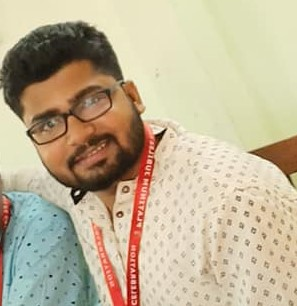

This image most likely belongs to pradipta with a 96.17 percent confidence.


In [ ]:
testset4='/content/drive/MyDrive/78395889_2588724741246109_2631001634435497984_n.jpg'
img = keras.preprocessing.image.load_img(
    testset4, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
from IPython.display import Image, display
display(Image(testset4, width=250, height=250))

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

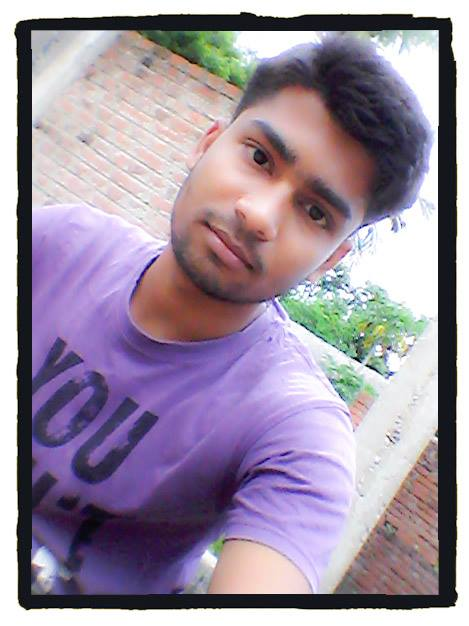

This image most likely belongs to pradipta with a 96.68 percent confidence.


In [ ]:
testset5='/content/drive/MyDrive/10405364_620990608008560_6318536469190067571_n.jpg'
img = keras.preprocessing.image.load_img(
    testset5, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
from IPython.display import Image, display
display(Image(testset5, width=250, height=250))

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

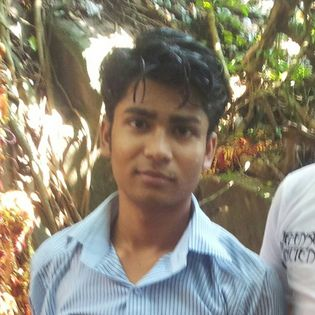

This image most likely belongs to pradipta


In [ ]:
testset6='/content/drive/MyDrive/10298178_595494030558218_1098787061417840215_o.jpg'
img = keras.preprocessing.image.load_img(
    testset6, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
from IPython.display import Image, display
display(Image(testset6))

print(
    "This image most likely belongs to {}"
    .format(class_names[np.argmax(score)])
)

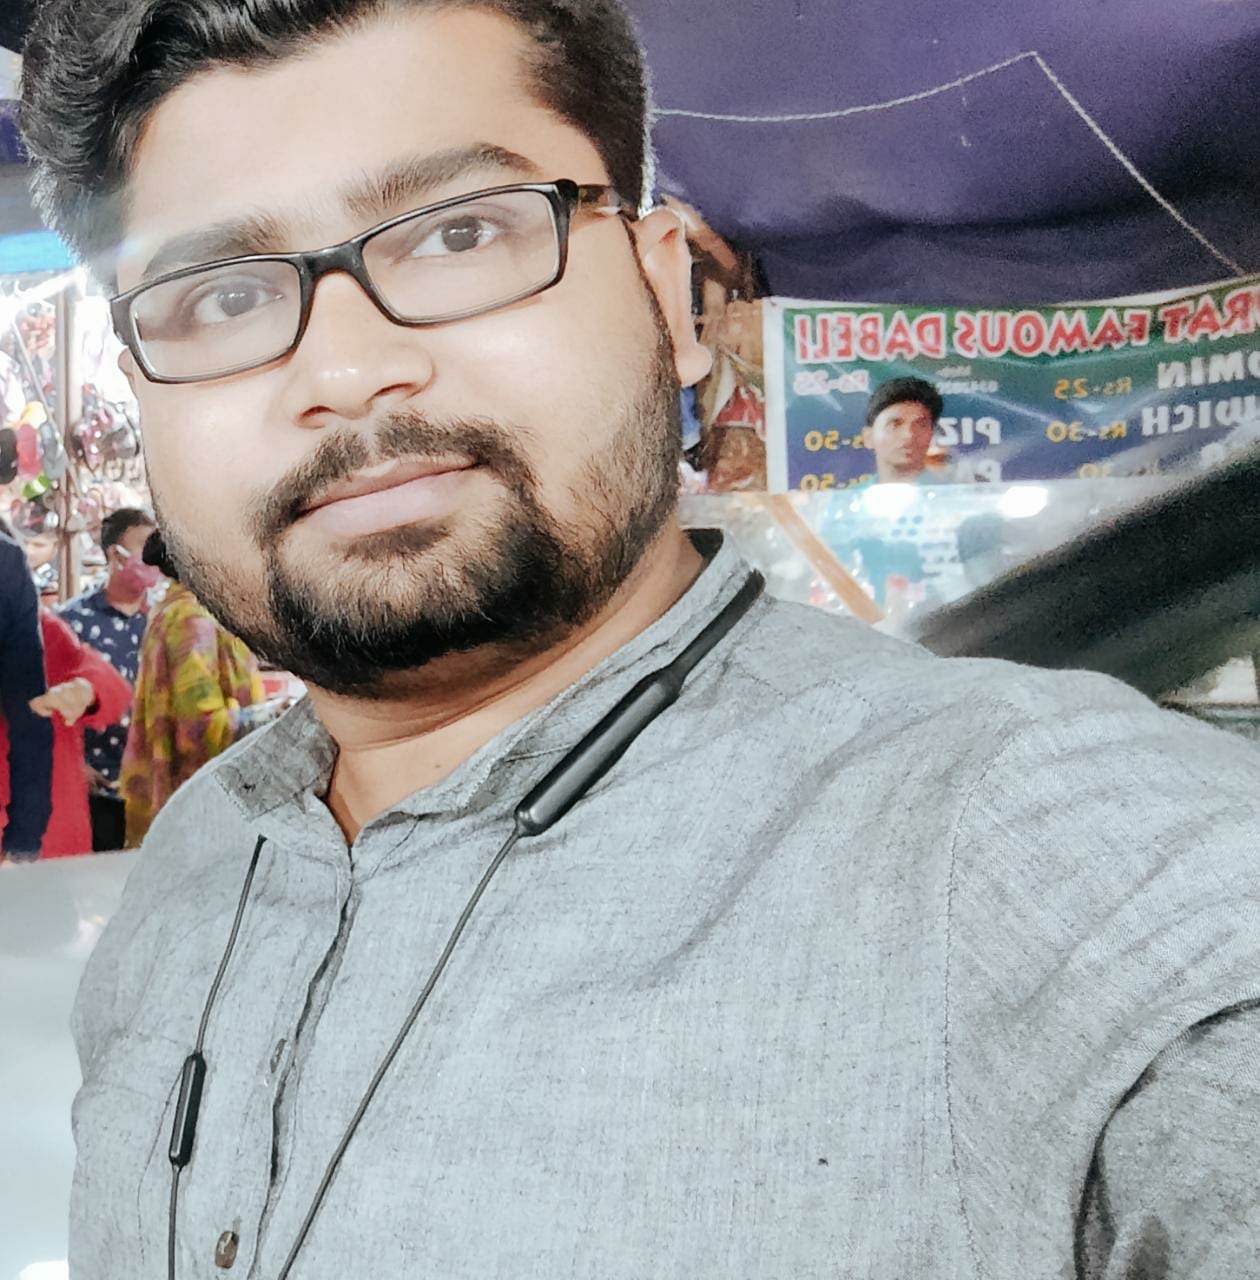

This image most likely belongs to pradipta with a 88.91 percent confidence.


In [ ]:
testset7='/content/drive/MyDrive/IMG-20210130-WA0093.jpg'
img = keras.preprocessing.image.load_img(
    testset7, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
from IPython.display import Image, display
display(Image(testset7, width=250, height=250))

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)],100 * np.max(score) )
)

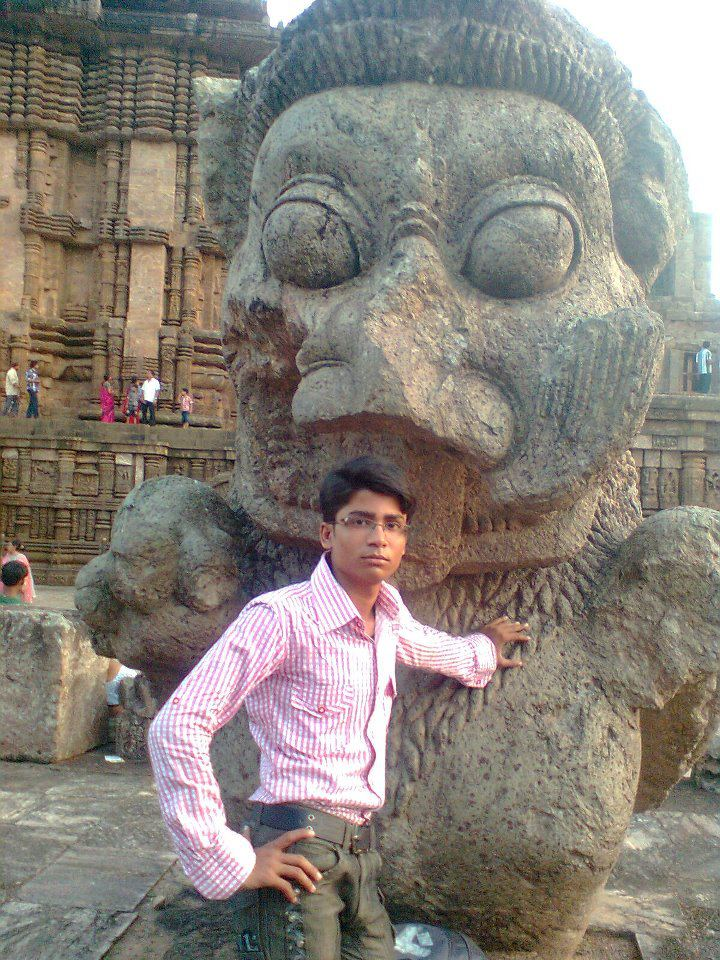

This image most likely belongs to pradipta with a 94.63 percent confidence.


In [ ]:
testset8='/content/drive/MyDrive/376064_131373526970273_906742324_n.jpg'
img = keras.preprocessing.image.load_img(
    testset8, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
from IPython.display import Image, display
display(Image(testset8, width=250, height=250))

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)],100 * np.max(score) )
)